<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f4f4f4; 
    border-radius: 10px; 
    align-items: center;">

<h1 style="margin: 0; color: #4CAF50;">Supervised ML Modelle: Lineare Regression und logistische Regression</h1>
<h2 style="margin: 5px 0; color: #555;">DSAI</h2>
<h3 style="margin: 5px 0; color: #555;">Jakob Eggl</h3>

<div style="flex-shrink: 0;">
    <img src="https://www.htl-grieskirchen.at/wp/wp-content/uploads/2022/11/logo_bildschirm-1024x503.png" alt="Logo" style="width: 250px; height: auto;"/>
</div>
<p1> © 2024/25 Jakob Eggl. Nutzung oder Verbreitung nur mit ausdrücklicher Genehmigung des Autors.</p1>
</div>
<div style="flex: 1;">
</div>   

Wir werden uns nun mit dem linearen und logistischen Regressionsmodell auseinandersetzen. Dies wird auch Ausgleichsrechnung genannt.
 
Dabei werden wir mit einem linearen Regressionsmodell beginnen und dieses dann zu einer logistischen Regression erweitern. Dies ermöglicht es uns dann, die ersten Klassifikationen durchzuführen.

## Lineare Regression

![Lineares Regressionsmodell](../resources/Lineare_Regression.png)

(von https://de.wikipedia.org/wiki/Lineare_Einfachregression)

### Problemstellung

Wir haben (im 1d Fall) Daten der Form

\begin{equation*}
    X=(x_1, x_2, \ldots, x_n) \quad \text{und} \quad Y = (y_1, y_2, \ldots, y_n)
\end{equation*}
gegeben, wobei $x_i\in \mathbb R$ und $y_i\in \mathbb R$ für das (einzige) Feature bzw. das Label des $i$-ten Datenpunktes stehen. 

Insgesamt wollen wir eine Funktion $f(x)$ finden, welche am besten durch die gegebene Punkte passt.

Im Fall der linearen Regression, ist dies eine *lineare* Funktion, sprich wir suchen die Parameter $k$ und $d$ jener linearen Funktion $f(x)=k \cdot x + d$, welche am besten zu den gegebenen Daten passen.

Der Fehler, der für die lineare Regression minimiert werden soll, nennt 
sich **Methode der kleinsten Quadrate** und ist, wie im vorigen Notebook 
bereits gesehen, folgendermaßen definiert
\begin{equation*}
    \text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(\hat y_i-y_i)^2,
\end{equation*}
erneut mit $\hat y_i$ als der Model Output für den $i$-ten Datenpunkt und 
$y_i$ als der eigentliche (target) Wert an dieser Stelle.

![Methode der kleinsten Quadrate](../resources/Methode_der_kleinsten_Quadrate.png)

Diesen Fehler wollen wir **minimieren**.

Wir erinnern uns an das Kapitel *Kurvendiskussion* in Mathematik und 
wiederholen kurz, wie man das Minimum einer Funktion finden kann.

* Wir berechnen die Ableitung der Funktion $\textrm{MSE}$
* Wir setzen diese Ableitung $0$ und lösen für die Koeffizienten $\tilde 
k,\tilde d$.

Für die Summe der quadrierten Differenzen ergibt sich mit $\hat y_i = kx_i + d$ (wir lassen die Division durch $n$ weg, weil dieses konstant ist):
\begin{equation*}
    \sum_{i=1}^{n}(\hat y_i-y_i)^2 = \sum_{i=1}^{n}[(kx_i+d)-y_i]^2.
\end{equation*}
Die Summe der Abweichungsquadrate ist also eine Funktion
\begin{equation*}
    f(k, d) = \sum_{i=1}^{n}(kx_i+d-y_i)^2,
\end{equation*}
die von 2 Variablen $k$ und $d$ abhängt.

Wir berechnen nun die Ableitungen $\partial f/\partial k$ und $\partial f/\partial d$.

\begin{align*}
    \frac{\partial f}{\partial k} &= 2 \cdot \sum_{i=1}^{n} (kx_i+d-y_i) 
    \cdot 
    x_i = 2 \cdot (k\cdot \sum_{i=1}^{n}x_i^2 + d\sum_{i=1}^{n}x_i - 
    \sum_{i=1}^{n}x_i\cdot y_i)\\
    \frac{\partial f}{\partial d} &= 2 \cdot \sum_{i=1}^{n}(kx_i+d-y_i) = 2 
    \cdot (k\cdot \sum_{i=1}^{n}x_i + d\cdot \sum_{i=1}^{n}1 - 
    \sum_{i=1}^{n}y_i)
\end{align*}

Durch Nullsetzen erhalten wir nun folgendes Gleichungssystem
\begin{align*}
    k\cdot \sum_{i=1}^{n}x_i^2 + d\sum_{i=1}^{n}x_i &= 
    \sum_{i=1}^{n}x_i\cdot y_i\\
    k\cdot \sum_{i=1}^{n}x_i + d\cdot n &= \sum_{i=1}^{n}y_i.
\end{align*}
Dieses müssen wir lösen.

Aus der zweiten Gleichung erhalten wir
\begin{equation*}
    d = \frac{\sum_{i=1}^{n}y_i - k\cdot \sum_{i=1}^{n}x_i}{n} = 
    \overline{y}- k \cdot \overline{x},
\end{equation*}
wobei $\overline{y}$ und $\overline{x}$ das arithmetische Mittel von $y$ 
bzw. $x$ darstellen.

Nun setzen wir dies in die erste Gleichung ein und erhalten
\begin{equation*}
    k\cdot \sum_{i=1}^{n}x_i^2 + \overline{y}-k\cdot 
    \overline{x}\sum_{i=1}^{n}x_i = 
    \sum_{i=1}^{n}x_i\cdot y_i
\end{equation*}

Umgeformt ergibt dies nun
\begin{equation*}
    k = \frac{\sum_{i=1}^{n}x_iy_i - 
    n\overline{x}\overline{y}}{-\overline{x}^2\cdot n + 
    \sum_{i=1}^{n}x_i^2}.
\end{equation*}

Somit wissen wir nun, welchen Werte wir für $k$ und $d$ verwenden müssen, 
sodass wir die optimalen Parameter für die 1-dimensionale lineare 
Regression bekommen.


Wir verwenden also
\begin{equation*}
    k = \frac{\sum_{i=1}^{n}x_iy_i - n\overline{x}\overline{y}}{-\overline{x}^2\cdot n + \sum_{i=1}^{n}x_i^2}, \qquad \qquad d = \overline{y}- k \cdot \overline{x}.
\end{equation*}

**Wichtig:** Auch wenn wir dies jetzt nicht (händisch) berechnen, können wir auch für mehrdimensionale Funktionen und für Polynome vom Grad größer 1 (Grad 1 $\hat =$ lineare Funktion $kx+d$) die optimalen Parameter bestimmen. Wir brauchen also beim Lernprozess für unser Model keinen iterativen Vorgang, sondern wir können die optimalen Parameter direkt berechnen.

**Wichtig:** Die direkte Berechnung der besten Lösung funktioniert leider nur für die wenigsten Machine Learning Modelle. In den meisten Fällen finden wir leider keine sogenannte Closed-Form Lösung. In diesen Fällen verwenden wir iterative Prozesse, wo unser Model dann versucht, das richtige Label zu erlernen, indem es Schritt für Schritt seine Parameter (sprich seine Klassifikationsregel) anpasst.

**Hinweis:** Es gibt auch eine mehrdimensionale Regression. Hier besitzt jeder Datenpunkt $n\geq 2$ Features. Dies funktioniert in Python genau gleich, weswegen wir da jetzt nicht genauer in die Details eingehen (Referat?).

Wir probieren nun die lineare und logistische Regression in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix
from sklearn.datasets import make_classification, make_regression

In [2]:
# Wir starten mit Regression

# Erzeugen von Daten (Dummy Dataset)

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

In [3]:
X

array([[ 0.93128012],
       [ 0.08704707],
       [-1.05771093],
       [ 0.31424733],
       [-0.47917424],
       [ 0.64768854],
       [-0.46341769],
       [ 0.54256004],
       [ 0.61167629],
       [ 1.0035329 ],
       [ 0.8219025 ],
       [ 1.53803657],
       [ 0.73846658],
       [-0.21967189],
       [-0.8084936 ],
       [ 0.09176078],
       [-1.95967012],
       [ 0.51326743],
       [ 1.03099952],
       [-2.6197451 ],
       [ 0.49671415],
       [ 0.09707755],
       [-0.46572975],
       [ 0.91540212],
       [ 1.56464366],
       [ 1.46564877],
       [-0.60063869],
       [-0.03582604],
       [-0.60170661],
       [-1.19620662],
       [ 0.35711257],
       [ 0.37569802],
       [ 0.26105527],
       [-0.5297602 ],
       [-0.90802408],
       [ 0.19686124],
       [-0.29900735],
       [ 0.36163603],
       [ 0.82254491],
       [-0.29169375],
       [ 0.36139561],
       [-0.676922  ],
       [ 1.52302986],
       [-0.51827022],
       [-0.23415337],
       [-0

In [4]:
X.shape

(100, 1)

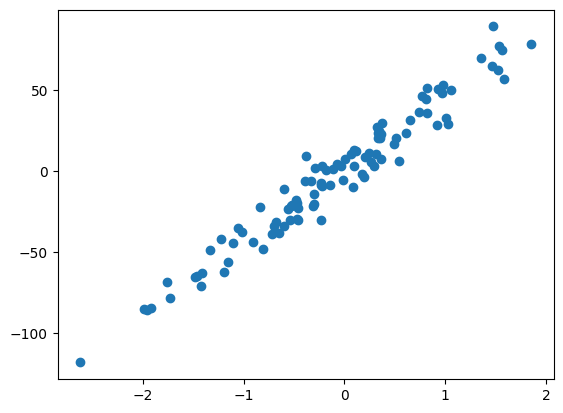

In [5]:
# Visualisierung der Daten
plt.scatter(X, y)

In [6]:
# Train und Test set erzeugen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80/20 split

In [7]:
# Standardisieren der Features (optional; welche anderen Methoden gibt es?)

# Standardisieren = z-score normalisieren

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

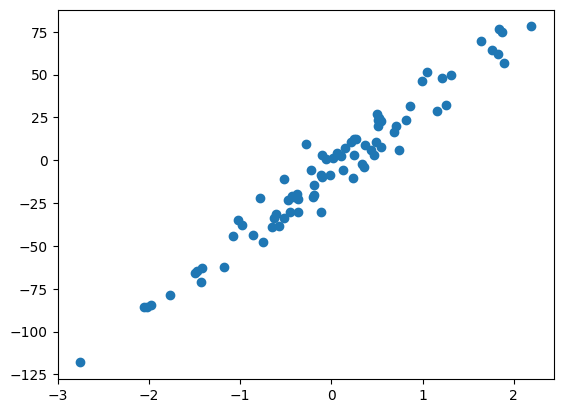

In [8]:
plt.scatter(X_train, y_train)

In [9]:
# Trainieren vom Model
reg_model = LinearRegression()

reg_model = reg_model.fit(X_train, y_train)

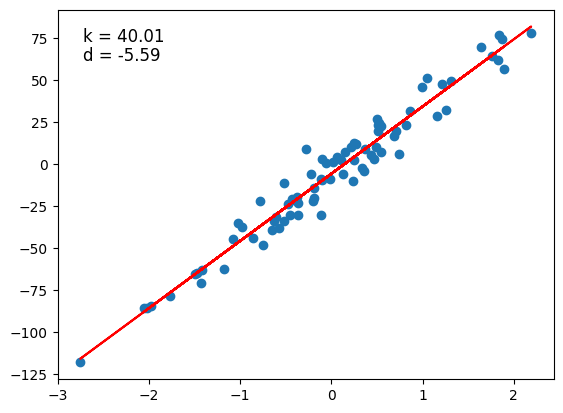

In [10]:
# Darstellen vom Model inkl. der Koeffizienten
plt.scatter(X_train, y_train)
plt.plot(X_train, reg_model.predict(X_train), color='red')
plt.text(0.05, 0.95, f'k = {reg_model.coef_[0]:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'd = {reg_model.intercept_:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()

In [11]:
# Prediction fürs Test-Set
y_pred = reg_model.predict(X_test)

In [12]:
X_test

array([[-1.3264453 ],
       [ 1.77652567],
       [ 1.04075969],
       [-0.29132783],
       [-0.11666101],
       [-0.18028931],
       [-0.37273879],
       [-1.80730815],
       [ 1.05112845],
       [ 1.17207851],
       [ 1.2823485 ],
       [ 0.53716248],
       [-1.20774579],
       [-0.44354384],
       [-1.13050539],
       [-0.38760574],
       [ 1.22102688],
       [ 0.40982897],
       [ 0.95886478],
       [ 0.55771432]])

In [13]:
y_pred

array([-58.66528327,  65.48743554,  36.04876271, -17.24928234,
       -10.26070235, -12.80652919, -20.50660984, -77.90504757,
        36.46362633,  41.30294944,  45.71495289,  15.89937588,
       -53.91600662, -23.33958474, -50.82554729, -21.10145005,
        43.26141852,  10.80464503,  32.7720721 ,  16.72167377])

In [14]:
# Berechnen des MSE
mse = mean_squared_error(y_test, y_pred)

In [15]:
mse

np.float64(104.20222653187018)

Ist dieser Wert gut oder schlecht?

Nun mag man sich vielleicht fragen, warum verwendet man nicht einfach auch eine lineare Funktion wenn man eine Klassifikationsaufgabe vor sich hat? Sprich warum ist es nicht möglich, einfach zu eine lineare Funktion zu verwenden und im Anschluss zum Beispiel zu sagen

\begin{equation*}
    \hat y = \begin{cases}
        1 & f(x)>0.5\\
        0 & \text{else},
    \end{cases}
\end{equation*}

wobei hier $\hat y$ dann die Klassifikation Vorhersage des Models, sprich von $f(x)$ ist. 

![Classification_with_Regression](../resources/Linear_Classification.png)

Was passiert bei den Punkten $f(x)$ mit $x$ in etwa $0.5$?

Obwohl die Daten bei $x=0.5$ einen großen Sprung (von Klasse 0 zu Klasse 1) 
machen, ist bei $f$ kein großer Unterschied zu sehen. Dies bedeutet, bei 
Werten bei ca. $0.5$ hat das Model fast gleiche Werte $f(x)$, jedoch ändert 
sich die Klassifizierung drastisch.

Wir könnten nun eine andere Funktion verwenden (zum Beispiel Polynom vom 
	Grad 5). Hier sieht das Ergebnis dann so aus:

![Classification_with_Polynomial](../resources/Classification_Polynomial.png)

Da auch das nicht ganz ideal ist, zeigen wir nun, wie man das Problem lösen kann. Dies führt nun zur sogenannten *Logistische Regression*.

## Logistische Regression

Für die logistische Regression verwenden wir die sogenannte *Sigmoid Funktion*.
	
Sie ist folgendermaßen definiert.

\begin{equation*}
    \sigma(x) = \frac{1}{1+e^{-x}}.
\end{equation*}

![Sigmoid_Funktion](../resources/Sigmoid.png)

(von https://de.wikipedia.org/wiki/Sigmoidfunktion)

Welche Eigenschaften fallen uns bei dieser Funktion auf?
* Alle Funktionswerte liegen zwischen $0$ und $1$
* Die Funktion ist monoton wachsend
* Die Funktion ist leicht zu differenzieren und erfüllt $\sigma'(x) = \sigma(x)\cdot (1-\sigma(x))$

Wir verwenden nun als Argument dieser Funktion unsere bisherige Funktion (also zum Beispiel $kx+d$) und erhalten dann
\begin{equation*}
    g(x) = \sigma(f(x)) = \sigma(k\cdot x + d).
\end{equation*}

Dies sieht dann so aus

![Regression_vs_Linear_Regression](../resources/Logistic_Regression_vs_Linear_Regression.png)

(von https://www.saedsayad.com/logistic_regression.htm)

bzw. mit expliziten Datenpunkten:

![Logistic_Regression_with_Points](../resources/Logistic_Regression_with_Points.png)

(von https://medium.com/analytics-vidhya/the-math-behind-logistic-regression-c2f04ca27bca)

Was ist nun ein großer **Nachteil**? Es is nur mehr die Klassifikation von binären Klassen (binary classification), sprich wenn es nur 2 verschiedene Labels gibt, möglich. Außerdem können wir die optimale Lösung **nicht** mehr analytisch finden (also *keine* **Closed-Form-Solution**). Der Grund dafür ist, dass wir nun nicht mehr den MSE minimieren, sondern wir optimieren jetzt nach einer anderen Funktion, genannt *Log-Likelihood*.

Nun müssen wir tatsächlich die Lösung (sprich in diesem Fall unsere Parameter der Funktion, also zum Beispiel $k$ und $d$) numerisch bestimmen. Das können (und werden) wir mit Python ganz einfach machen.

Wir haben nun alle Grundlagen für die logistische Regression gelernt und können nun mit Hilfe von Python versuchen, bei verschiedenen Datasets eine Regression und eine Klassifikation zu machen.

In [16]:
# Dummy Dataset für Klassifikation
X, y = make_classification(n_samples=1000, n_features=1, n_classes=2, random_state=42, n_informative=1, n_redundant=0, n_clusters_per_class=1)

In [17]:
X

array([[-1.86929547],
       [-0.70735509],
       [-1.64877149],
       [-1.30731491],
       [-0.83443017],
       [ 2.35251116],
       [ 0.32180257],
       [-1.08694704],
       [-0.97825685],
       [ 0.0312452 ],
       [-1.37966208],
       [ 1.14779012],
       [ 1.63134481],
       [-1.23040013],
       [ 1.53935701],
       [ 0.52072835],
       [ 1.1462325 ],
       [ 0.69931509],
       [-1.13890157],
       [-0.43685268],
       [-0.90804942],
       [ 1.707513  ],
       [ 0.74207303],
       [ 0.68433749],
       [ 1.55370057],
       [ 0.70842943],
       [ 1.28415129],
       [ 0.02023937],
       [-1.63206496],
       [-1.19750515],
       [-0.66517115],
       [ 2.25265223],
       [-0.86159145],
       [-2.80900725],
       [ 1.61553344],
       [-0.20966677],
       [-0.68674312],
       [ 2.01197177],
       [ 0.4869585 ],
       [-1.16658647],
       [ 1.03175949],
       [ 1.35287056],
       [-0.6582606 ],
       [ 1.13216773],
       [-0.23988494],
       [ 0

In [18]:
# Train und Test set erzeugen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardisieren der Features (optional; welche anderen Methoden gibt es?)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Auswahl und Training von Model
class_model = LogisticRegression()
class_model.fit(X_train, y_train)

LogisticRegression()

In [21]:
# Prediction vom Testset
y_pred = class_model.predict(X_test)

In [22]:
# Metriken berechnen
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
# print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.91


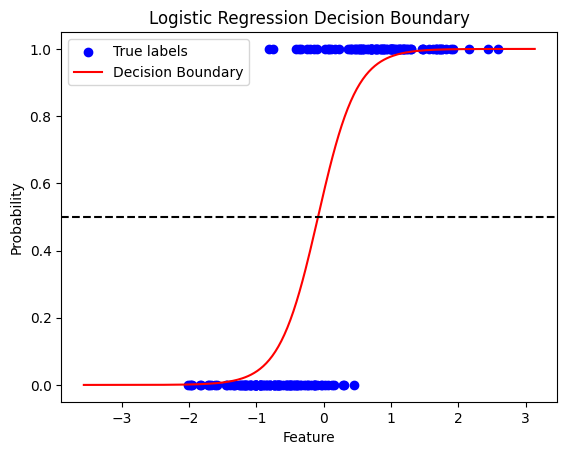

In [23]:
# Visualisierung der Ergebnisse
X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_plot_scaled = scaler.transform(X_plot)
y_prob = class_model.predict_proba(X_plot_scaled)[:, 1]


plt.scatter(X_test, y_test, color='blue', label='True labels')
plt.plot(X_plot, y_prob, color='red', label='Decision Boundary')
plt.axhline(0.5, color='black', linestyle='--')
plt.xlabel('Feature')
plt.ylabel('Probability')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

**Wichtig:** Auch wenn die **logistische Regression** für Klassifikationsaufgaben verwendet wird, ist es rein technisch **keine Klassifikation**. Wir werden aber trotzdem von Klassifikation sprechen, wenn wir von logistischer Regression sprechen, auch wenn es genau genommen nicht ganz korrekt ist.

---

## Aufgabe

* Verwende nun die folgenden Datasets und versuche die bestmögliche Performance zu erreichen.
* Lade dazu das Dataset mit den bekannten Methoden (Laden mit Hilfe von `pd.read_csv`)
* Überlege, wie du bei schlechter Performance diese verbessern kannst. Zum Beipsiel: Normalisieren, Ausreißer entfernen etc.
* Müssen wir ggf. Features entfernen?
* Gehören ggf. Features mit einem Ordinal-Encoder oder mit einem Onehot-Encoder encodiert?
* Verwende für jedes Dataset eigene Code-Zellen und dokumentiere für die verschiedenen Durchläufe die Ergebnisse (zBsp. Accuracy, Confusion Matrix oder den MSE)

**Datasets:**
* Breast Cancer `breast_cancer.csv` (verwendet von https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)
* Diabetes `diabetes.csv` (verwendet von https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* Stroke Prediction `stroke.csv` (verwendet von https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)
* Cars `cars.csv` (verwendet von https://www.kaggle.com/datasets/hellbuoy/car-price-prediction)

*Hinweis:* Überlege dir stets, welchen Problemtyp du verwendest und verwende dementsprechend das richtige Model! 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Lade das cars dataset
cars = pd.read_csv("../../_data/cars.csv") # ggf. etwas anders als unser bisheriges Dataset
print(cars.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

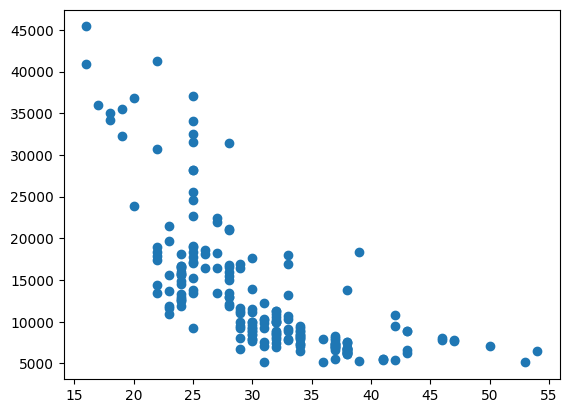

In [52]:
plt.scatter(cars.highwaympg, cars.price)


In [48]:
x = cars.drop('price', axis=1)
x = x.select_dtypes(include=[np.number])
y = cars.price
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
X_train

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
66,67,0,104.9,175.0,66.1,54.4,2700,134,3.43,3.64,22.0,72,4200,31,39
111,112,0,107.9,186.7,68.4,56.7,3075,120,3.46,2.19,8.4,95,5000,19,24
153,154,0,95.7,169.7,63.6,59.1,2280,92,3.05,3.03,9.0,62,4800,31,37
96,97,1,94.5,165.3,63.8,54.5,1971,97,3.15,3.29,9.4,69,5200,31,37
38,39,0,96.5,167.5,65.2,53.3,2289,110,3.15,3.58,9.0,86,5800,27,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,99.2,178.5,67.9,49.7,3139,181,3.43,3.27,9.0,160,5200,19,25
14,15,1,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121,4250,20,25
92,93,1,94.5,165.3,63.8,54.5,1938,97,3.15,3.29,9.4,69,5200,31,37
179,180,3,102.9,183.5,67.7,52.0,3016,171,3.27,3.35,9.3,161,5200,19,24


In [50]:
X_train

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
66,67,0,104.9,175.0,66.1,54.4,2700,134,3.43,3.64,22.0,72,4200,31,39
111,112,0,107.9,186.7,68.4,56.7,3075,120,3.46,2.19,8.4,95,5000,19,24
153,154,0,95.7,169.7,63.6,59.1,2280,92,3.05,3.03,9.0,62,4800,31,37
96,97,1,94.5,165.3,63.8,54.5,1971,97,3.15,3.29,9.4,69,5200,31,37
38,39,0,96.5,167.5,65.2,53.3,2289,110,3.15,3.58,9.0,86,5800,27,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,99.2,178.5,67.9,49.7,3139,181,3.43,3.27,9.0,160,5200,19,25
14,15,1,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121,4250,20,25
92,93,1,94.5,165.3,63.8,54.5,1938,97,3.15,3.29,9.4,69,5200,31,37
179,180,3,102.9,183.5,67.7,52.0,3016,171,3.27,3.35,9.3,161,5200,19,24


In [53]:
# Trainieren vom Model
reg_model = LinearRegression()

reg_model = reg_model.fit(X_train, y_train)

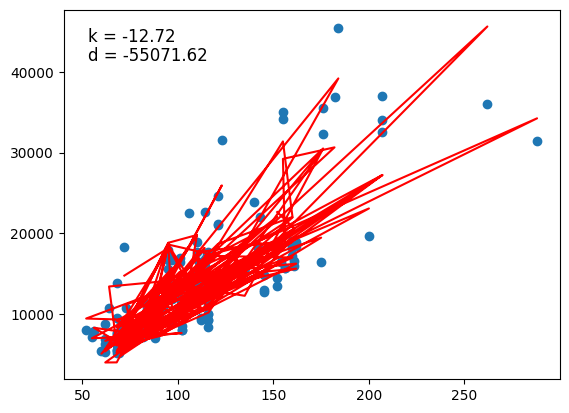

In [62]:
# Darstellen vom Model inkl. der Koeffizienten
plt.scatter(X_train.horsepower, y_train)
plt.plot(X_train.horsepower, reg_model.predict(X_train), color='red')
plt.text(0.05, 0.95, f'k = {reg_model.coef_[0]:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'd = {reg_model.intercept_:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()

In [63]:

y_pred = reg_model.predict(X_test)

In [65]:
y_pred

array([28136.61662501, 17897.05420754, 10501.64869541, 14894.10445051,
       25867.1892059 ,  6173.84364331,  8980.28750149,  5919.21217674,
       11392.64574211,  9460.45070261, 14560.47727625,  5262.80065897,
       17528.77959034,  7491.46641038, 40299.85379014,  5336.56626822,
       -1096.23360087, 15347.30470178, 10145.97735703, 11163.54831384,
       11083.28073461, 22416.79275323,  6592.9098689 ,   938.10218382,
        6895.75103695, 27936.87659594, 12978.79601747, 16477.60756576,
        5956.53671362, 15851.60074806, 25165.44825207,  5672.24625495,
        6140.96330188, 23125.61626048,  8083.42458411, 24748.61143859,
       10938.04831201,  9709.93935657,  5425.3770443 , 15389.31688372,
        9064.98801667])

In [66]:
mse = mean_squared_error(y_test, y_pred)

In [73]:
mse

np.float64(11710105.07880735)